# Leap of Faith in PyTorch [L5] - PyTorch Neural Networks: Mastering Linear and Non-linear Layers for GDP Analysis (Day 5) - Demo

## 👉 [check it on Medium - Leap of Faith in PyTorch [L5] - PyTorch Neural Networks: Mastering Linear and Non-linear Layers for GDP Analysis (Day 5)](https://medium.com/gitconnected/pytorch-neural-networks-mastering-linear-and-non-linear-layers-for-gdp-analysis-8b86304dce30)

### Step 1: Import Libraries and Define Data


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()


### Step 2: Build the Neural Network

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)   # Linear transformation from 1 input to 64 neurons
        self.fc2 = nn.Linear(64, 32)  # Linear transformation from 64 to 32 neurons
        self.fc3 = nn.Linear(32, 5)   # Linear transformation from 32 to 5 neurons (for each country)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU non-linearity
        x = torch.relu(self.fc2(x))  # Apply ReLU non-linearity
        x = self.fc3(x)              # Linear output layer
        return x

model = SimpleNN()


### Step 3: Define Loss Function and Optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Step 4: Train the Model

In [5]:
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years)
    loss = criterion(outputs, gdp_growth_data)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 44641.6484375
Epoch 100, Loss: 11.917682647705078
Epoch 200, Loss: 11.874786376953125
Epoch 300, Loss: 11.874774932861328
Epoch 400, Loss: 11.874772071838379
Epoch 500, Loss: 11.874768257141113
Epoch 600, Loss: 11.874772071838379
Epoch 700, Loss: 11.874760627746582
Epoch 800, Loss: 11.874760627746582
Epoch 900, Loss: 11.874750137329102
Epoch 1000, Loss: 11.874740600585938
Epoch 1100, Loss: 11.874743461608887
Epoch 1200, Loss: 11.87475299835205
Epoch 1300, Loss: 11.874744415283203
Epoch 1400, Loss: 11.874736785888672
Epoch 1500, Loss: 11.87474250793457
Epoch 1600, Loss: 11.874739646911621
Epoch 1700, Loss: 11.874744415283203
Epoch 1800, Loss: 11.874747276306152
Epoch 1900, Loss: 11.874741554260254
Epoch 2000, Loss: 11.874731063842773
Epoch 2100, Loss: 11.874748229980469
Epoch 2200, Loss: 11.874735832214355
Epoch 2300, Loss: 11.874725341796875
Epoch 2400, Loss: 11.874724388122559
Epoch 2500, Loss: 11.874730110168457
Epoch 2600, Loss: 11.87470817565918
Epoch 2700, Loss: 11.

### Step 5: Predicting Future GDP Growth

In [6]:
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_predictions = model(future_years)

### Step 6: Visualize the Results

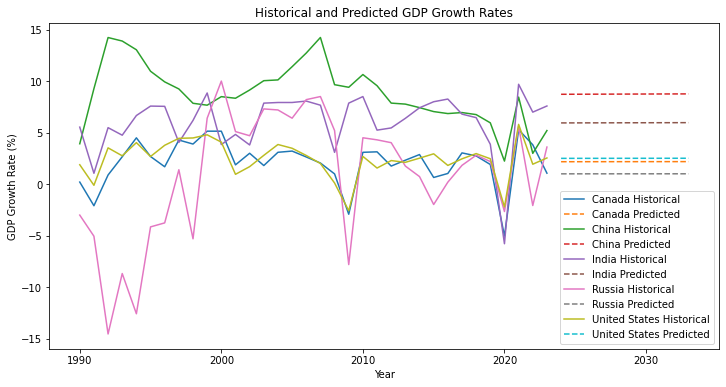

In [7]:
plt.figure(figsize=(12, 6))
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].numpy(), label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Historical and Predicted GDP Growth Rates')
plt.legend()
plt.show()

## Exercise 1 : Solution - Add Dropout Layers

In [8]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

# Normalize the years for prediction phase
years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithDropout(nn.Module):
    def __init__(self):
        super(SimpleNNWithDropout, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first hidden layer
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second hidden layer
        x = self.fc3(x)
        return x

model = SimpleNNWithDropout()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

# Denormalize predictions
future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.5525956749916077
Epoch 100, Loss: 0.3284561038017273
Epoch 200, Loss: 0.2376307100057602
Epoch 300, Loss: 0.16817894577980042
Epoch 400, Loss: 0.1622786819934845
Epoch 500, Loss: 0.1006254181265831
Epoch 600, Loss: 0.09570756554603577
Epoch 700, Loss: 0.0902862399816513
Epoch 800, Loss: 0.09442242234945297
Epoch 900, Loss: 0.09809218347072601
Epoch 1000, Loss: 0.0913473591208458
Epoch 1100, Loss: 0.08822115510702133
Epoch 1200, Loss: 0.08208803832530975
Epoch 1300, Loss: 0.09079756587743759
Epoch 1400, Loss: 0.0741560310125351
Epoch 1500, Loss: 0.05981940031051636
Epoch 1600, Loss: 0.07661767303943634
Epoch 1700, Loss: 0.057886186987161636
Epoch 1800, Loss: 0.06853945553302765
Epoch 1900, Loss: 0.0619000643491745
Epoch 2000, Loss: 0.06300538033246994
Epoch 2100, Loss: 0.05999036505818367
Epoch 2200, Loss: 0.05204901844263077
Epoch 2300, Loss: 0.04455703869462013
Epoch 2400, Loss: 0.04874051734805107
Epoch 2500, Loss: 0.051995210349559784
Epoch 2600, Loss: 0.04531057551

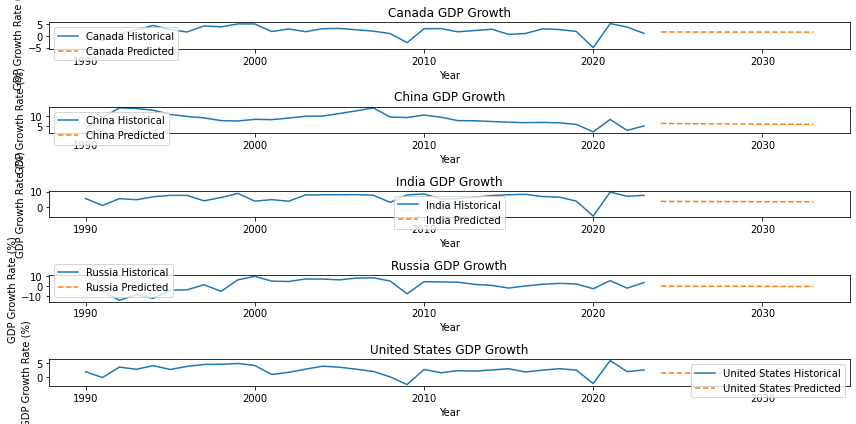

In [9]:
# Plot results
plt.figure(figsize=(12, 6))
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.subplot(5, 1, i+1)  # Create a subplot for each country
    plt.plot(years, gdp_growth_data[:, i], label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions_denorm[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth Rate (%)')
    plt.title(f'{country} GDP Growth')
    plt.legend()

plt.tight_layout()
plt.show()

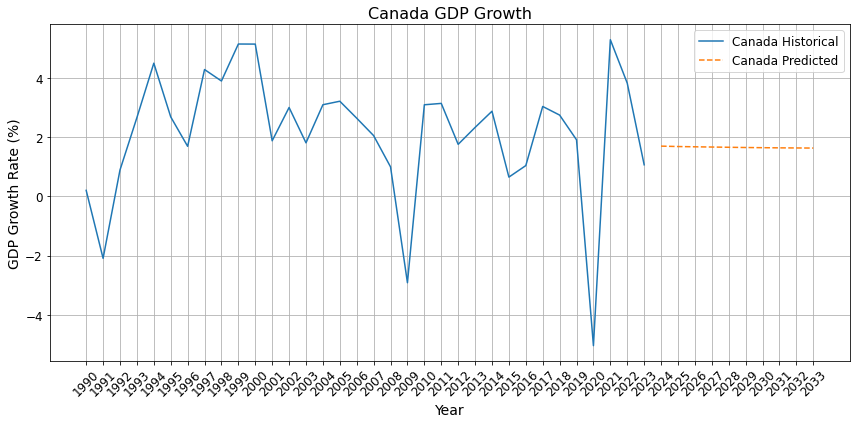

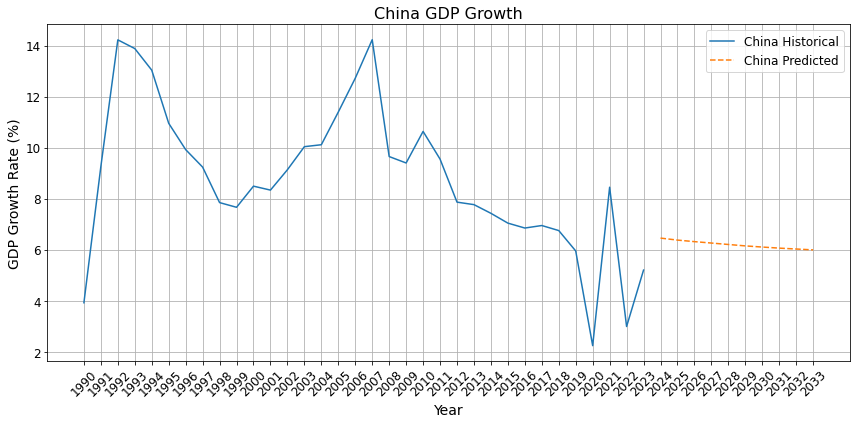

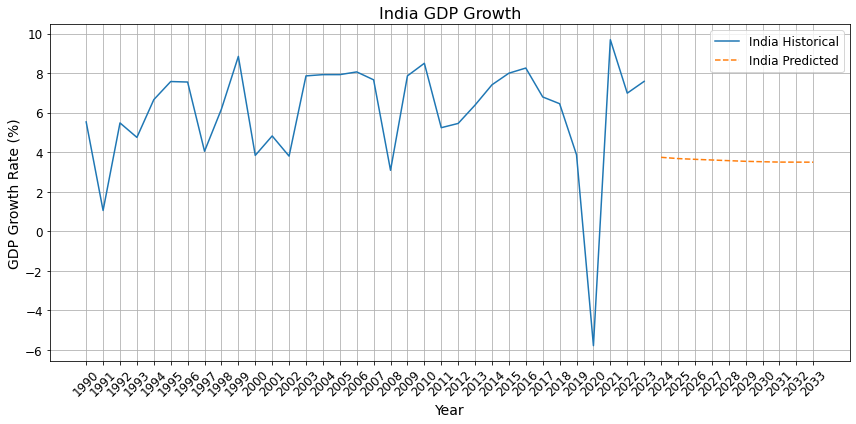

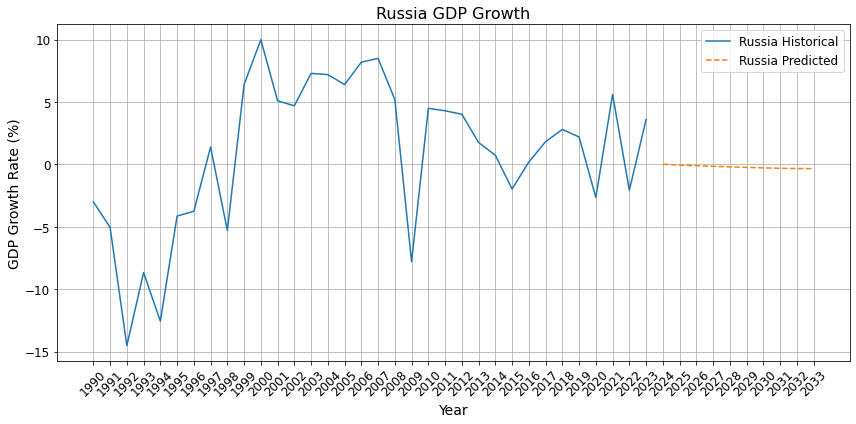

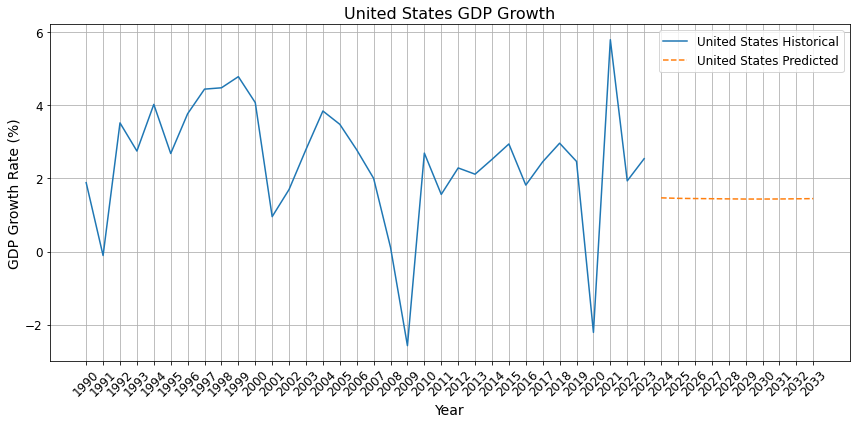

In [10]:
# Plot results: One plot per country
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.figure(figsize=(12, 6))
    plt.plot(years, gdp_growth_data[:, i], label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions_denorm[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')
    
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('GDP Growth Rate (%)', fontsize=14)
    plt.title(f'{country} GDP Growth', fontsize=16)
    plt.legend(fontsize=12)
    
    plt.xticks(np.arange(1990, 2034, 1), rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Exercise 2 : Solution - Replace ReLU with Sigmoid or Tanh Activation

In [11]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithDropoutAndSigmoidActivationFunction(nn.Module):
    def __init__(self):
        super(SimpleNNWithDropoutAndSigmoidActivationFunction, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first hidden layer
        x = torch.sigmoid(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second hidden layer
        x = self.fc3(x)
        return x

model = SimpleNNWithDropoutAndSigmoidActivationFunction()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 1.1392145156860352
Epoch 100, Loss: 0.6485975980758667
Epoch 200, Loss: 0.40317589044570923
Epoch 300, Loss: 0.25157520174980164
Epoch 400, Loss: 0.20804466307163239
Epoch 500, Loss: 0.18079553544521332
Epoch 600, Loss: 0.1600474715232849
Epoch 700, Loss: 0.13573458790779114
Epoch 800, Loss: 0.10038962960243225
Epoch 900, Loss: 0.13499191403388977
Epoch 1000, Loss: 0.09281390905380249
Epoch 1100, Loss: 0.11073518544435501
Epoch 1200, Loss: 0.07944459468126297
Epoch 1300, Loss: 0.08373409509658813
Epoch 1400, Loss: 0.0898345485329628
Epoch 1500, Loss: 0.08770254999399185
Epoch 1600, Loss: 0.09048648178577423
Epoch 1700, Loss: 0.05525169521570206
Epoch 1800, Loss: 0.07406453788280487
Epoch 1900, Loss: 0.0803760439157486
Epoch 2000, Loss: 0.05962391942739487
Epoch 2100, Loss: 0.0640537217259407
Epoch 2200, Loss: 0.06653893738985062
Epoch 2300, Loss: 0.07532571256160736
Epoch 2400, Loss: 0.054322052747011185
Epoch 2500, Loss: 0.05976012721657753
Epoch 2600, Loss: 0.073147311

## Exercise 3 : Solution - Add Batch Normalization Layers

In [12]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(SimpleNNWithBatchNorm, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch Normalization after first linear layer
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)  # Batch Normalization after second linear layer
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)  # Apply Batch Normalization
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)  # Apply Batch Normalization
        x = self.fc3(x)
        return x

model = SimpleNNWithDropout()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.5358548164367676
Epoch 100, Loss: 0.3016594350337982
Epoch 200, Loss: 0.19377225637435913
Epoch 300, Loss: 0.13527227938175201
Epoch 400, Loss: 0.08288121968507767
Epoch 500, Loss: 0.1064988523721695
Epoch 600, Loss: 0.09942640364170074
Epoch 700, Loss: 0.07822813093662262
Epoch 800, Loss: 0.08102264255285263
Epoch 900, Loss: 0.07629512250423431
Epoch 1000, Loss: 0.09495318681001663
Epoch 1100, Loss: 0.05724583938717842
Epoch 1200, Loss: 0.06332051008939743
Epoch 1300, Loss: 0.06843722611665726
Epoch 1400, Loss: 0.0556454136967659
Epoch 1500, Loss: 0.07128944247961044
Epoch 1600, Loss: 0.054572202265262604
Epoch 1700, Loss: 0.046624213457107544
Epoch 1800, Loss: 0.05463225394487381
Epoch 1900, Loss: 0.06908629834651947
Epoch 2000, Loss: 0.05054963007569313
Epoch 2100, Loss: 0.04685434699058533
Epoch 2200, Loss: 0.03804967179894447
Epoch 2300, Loss: 0.056838225573301315
Epoch 2400, Loss: 0.04301558434963226
Epoch 2500, Loss: 0.04341920465230942
Epoch 2600, Loss: 0.04316

## Exercise 4 : Solution - Implement a Custom Activation Function

In [13]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithLeakyReLU(nn.Module):
    def __init__(self):
        super(SimpleNNWithLeakyReLU, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x), negative_slope=0.01)  # Leaky ReLU activation
        x = torch.nn.functional.leaky_relu(self.fc2(x), negative_slope=0.01)  # Leaky ReLU activation
        x = self.fc3(x)
        return x

model = SimpleNNWithLeakyReLU()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.4309430718421936
Epoch 100, Loss: 0.27580422163009644
Epoch 200, Loss: 0.12932880222797394
Epoch 300, Loss: 0.04004187136888504
Epoch 400, Loss: 0.01839022897183895
Epoch 500, Loss: 0.015224706381559372
Epoch 600, Loss: 0.01399246696382761
Epoch 700, Loss: 0.013200238347053528
Epoch 800, Loss: 0.012655041180551052
Epoch 900, Loss: 0.01225917600095272
Epoch 1000, Loss: 0.011953766457736492
Epoch 1100, Loss: 0.011695927940309048
Epoch 1200, Loss: 0.011461634188890457
Epoch 1300, Loss: 0.011239268817007542
Epoch 1400, Loss: 0.011024214327335358
Epoch 1500, Loss: 0.01081557385623455
Epoch 1600, Loss: 0.010615172795951366
Epoch 1700, Loss: 0.01042388379573822
Epoch 1800, Loss: 0.010213094763457775
Epoch 1900, Loss: 0.009697367437183857
Epoch 2000, Loss: 0.009338708594441414
Epoch 2100, Loss: 0.009078268893063068
Epoch 2200, Loss: 0.008878710679709911
Epoch 2300, Loss: 0.008716696873307228
Epoch 2400, Loss: 0.00857828464359045
Epoch 2500, Loss: 0.008459927514195442
Epoch 260

## Exercise 5 : Solution - Experiment with Different Optimizers

In [14]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithLeakyReLU(nn.Module):
    def __init__(self):
        super(SimpleNNWithLeakyReLU, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x), negative_slope=0.01)  # Leaky ReLU activation
        x = torch.nn.functional.leaky_relu(self.fc2(x), negative_slope=0.01)  # Leaky ReLU activation
        x = self.fc3(x)
        return x

model = SimpleNNWithLeakyReLU()

criterion = nn.MSELoss()

# Using SGD optimizer instead of Adam
# optimizer = optim.Adam(model.parameters(), lr=0.0001)
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer_sgd.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer_sgd.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.5868616700172424
Epoch 100, Loss: 0.0135506521910429
Epoch 200, Loss: 0.01301159430295229
Epoch 300, Loss: 0.012726654298603535
Epoch 400, Loss: 0.012535696849226952
Epoch 500, Loss: 0.01238822378218174
Epoch 600, Loss: 0.012262669391930103
Epoch 700, Loss: 0.012146891094744205
Epoch 800, Loss: 0.012032251805067062
Epoch 900, Loss: 0.011917715892195702
Epoch 1000, Loss: 0.011801335029304028
Epoch 1100, Loss: 0.011682005599141121
Epoch 1200, Loss: 0.011556883342564106
Epoch 1300, Loss: 0.011427242308855057
Epoch 1400, Loss: 0.0112910820171237
Epoch 1500, Loss: 0.011148751713335514
Epoch 1600, Loss: 0.010996299795806408
Epoch 1700, Loss: 0.010836957953870296
Epoch 1800, Loss: 0.010670195333659649
Epoch 1900, Loss: 0.01049659214913845
Epoch 2000, Loss: 0.010318415239453316
Epoch 2100, Loss: 0.010142214596271515
Epoch 2200, Loss: 0.00997093878686428
Epoch 2300, Loss: 0.009801561012864113
Epoch 2400, Loss: 0.009639141149818897
Epoch 2500, Loss: 0.009489517658948898
Epoch 26